<a href="https://colab.research.google.com/github/taareek/resume_classification/blob/main/EDA_n_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing Libraries

In [ ]:
!pip install nltk
!pip install gensim
!pip install wordcloud
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.2 MB/s eta 0:00:00


### Connecting with drive to access data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load the supplimentary resume text in csv format
resume_csv_data = pd.read_csv("/content/drive/MyDrive/IC_Evaluation/archive/Resume/Resume.csv")
resume_csv_data.head(5)

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

### EDA using loaded CSV Resume Data

**Checking for Null values**

In [ ]:
# getting information about the csv data
resume_csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [ ]:
# checking is there any null values are not
id_null = resume_csv_data['ID'].isnull().values.sum()
resume_str_null = resume_csv_data['Resume_str'].isnull().values.sum()
resume_html_null = resume_csv_data['Resume_html'].isnull().values.sum()
resume_cat_null = resume_csv_data['Category'].isnull().values.sum()

print(f"Total Null values in ID: {id_null}")
print(f"Total Null values in Resume_str: {resume_str_null}")
print(f"Total Null values in Resume_html: {resume_html_null}")
print(f"Total Null values in Category: {resume_cat_null}")

Total Null values in ID: 0
Total Null values in Resume_str: 0
Total Null values in Resume_html: 0
Total Null values in Category: 0


In [ ]:
# finding total catories
resume_csv_data['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [ ]:
print(f"Total categories found: {len(resume_csv_data['Category'].unique())}")

Total categories found: 24


In [ ]:
# describing the category column
resume_csv_data['Category'].describe()

count                       2484
unique                        24
top       INFORMATION-TECHNOLOGY
freq                         120
Name: Category, dtype: object

In [ ]:
# counting total resume in each category
resume_csv_data['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

**plotiing bar chart for category visualization**

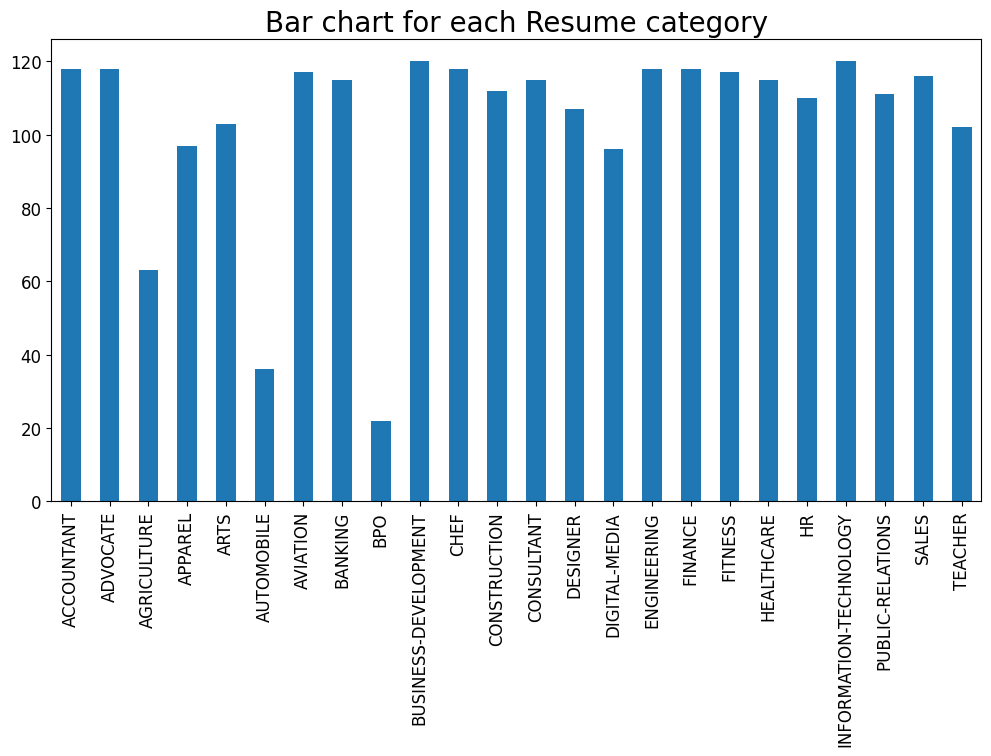

In [ ]:
# plotting bar-chart to visually explains the frequencies of each category
resume_csv_data['Category'].value_counts().sort_index().plot(kind='bar',
                                                             figsize=(12, 6),
                                                             fontsize= 12)
plt.title("Bar chart for each Resume category", fontsize= 20)
plt.show()

from the bar chart, we can see that BPO, AUTOMOBILE, and AGRICULTURE class contains comperatively lower samples, which is slightly imbalanced.

**Pie Chart to visualize resume catagory distribution**

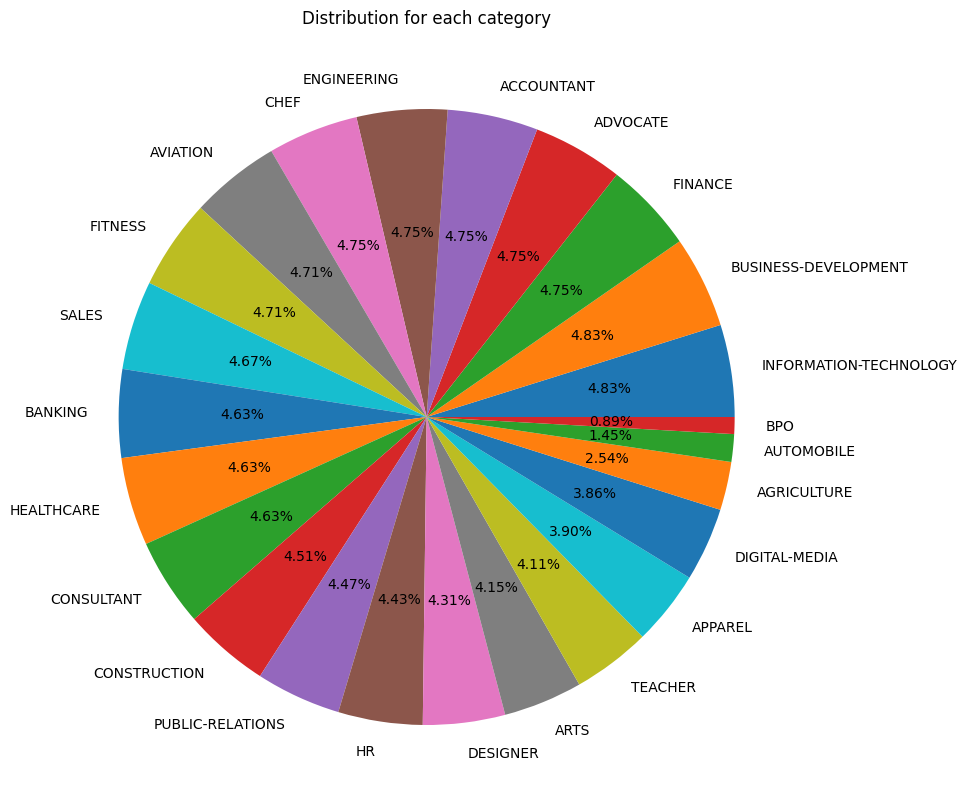

In [ ]:
# plotting a pie chart to get the distribution for each category
from matplotlib.gridspec import GridSpec
count=resume_csv_data['Category'].value_counts()
label=resume_csv_data['Category'].value_counts().keys()

plt.figure(1, figsize=(22,22))
grid=GridSpec(2,2)

cmap=plt.get_cmap('viridis')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution for each category')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

This pie chart gives us the visual class distribution of each category resumes.

**Cleaning the raw text**

In [ ]:
# function to convert all characters in lower case and remove unnecessay characters and words
import re
import nltk

def preprocess_text(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]

    return ' '.join(txt)

In [ ]:
# initializing NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**after cleaning the resumes**

In [ ]:
# pre-process the Resume_str column
resume_csv_data["Resume"] = resume_csv_data["Resume_str"].apply(lambda w: preprocess_text(w))

# remove 'Resume_str' column and replacing with pre-processed resume data
resume_csv_data.pop("Resume_str")

# checking converted data frame
resume_csv_data.head(5)

ID                                        Resume_html Category  \
0  16852973  <div class="fontsize fontface vmargins hmargin...       HR   
1  22323967  <div class="fontsize fontface vmargins hmargin...       HR   
2  33176873  <div class="fontsize fontface vmargins hmargin...       HR   
3  27018550  <div class="fontsize fontface vmargins hmargin...       HR   
4  17812897  <div class="fontsize fontface vmargins hmargin...       HR   

                                              Resume  
0  hr administrator marketing associate hr admini...  
1  hr specialist us hr operations summary versati...  
2  hr director summary years experience recruitin...  
3  hr specialist summary dedicated driven dynamic...  
4  hr manager skill highlights hr skills hr depar...

In [ ]:
# tokenization and getting word frequencies

import string
from nltk.corpus import stopwords

# creating a set of stopwords including common english words and special character
stop_words = set(stopwords.words('english')+['``',"''"])
total_words =[]

# getting all sentences
all_sentences = resume_csv_data['Resume'].values

clean_sentences = ""
for records in all_sentences:
    clean_sentences += records
    # tokenize the words for current recod
    required_words = nltk.word_tokenize(records)
    for word in required_words:
        if word not in stop_words and word not in string.punctuation:
            total_words.append(word)

# making a frequncy distribution of words
word_freq_dist = nltk.FreqDist(total_words)

# getting the most 50 common words in among all resumes
most_common = word_freq_dist.most_common(50)
print(most_common)

[('state', 16159), ('company', 15212), ('city', 15077), ('management', 12174), ('name', 11739), ('sales', 8275), ('customer', 7927), ('business', 7866), ('skills', 7729), ('new', 6409), ('service', 6223), ('team', 6073), ('development', 5731), ('training', 5637), ('experience', 5632), ('project', 5362), ('work', 4817), ('manager', 4534), ('information', 4502), ('marketing', 4489), ('financial', 4227), ('office', 4189), ('support', 4123), ('education', 4093), ('including', 4045), ('staff', 3950), ('professional', 3857), ('data', 3797), ('system', 3697), ('systems', 3559), ('university', 3477), ('managed', 3432), ('process', 3428), ('customers', 3418), ('design', 3384), ('quality', 3367), ('client', 3272), ('clients', 3244), ('developed', 3228), ('reports', 3090), ('analysis', 3052), ('operations', 3008), ('product', 2951), ('high', 2950), ('program', 2934), ('services', 2847), ('ounting', 2843), ('microsoft', 2830), ('current', 2787), ('ounts', 2782)]


In [ ]:
# a single word with its frequency
most_common[1]

('company', 15212)

**plotiing word cloud to visualize the most appeared words**

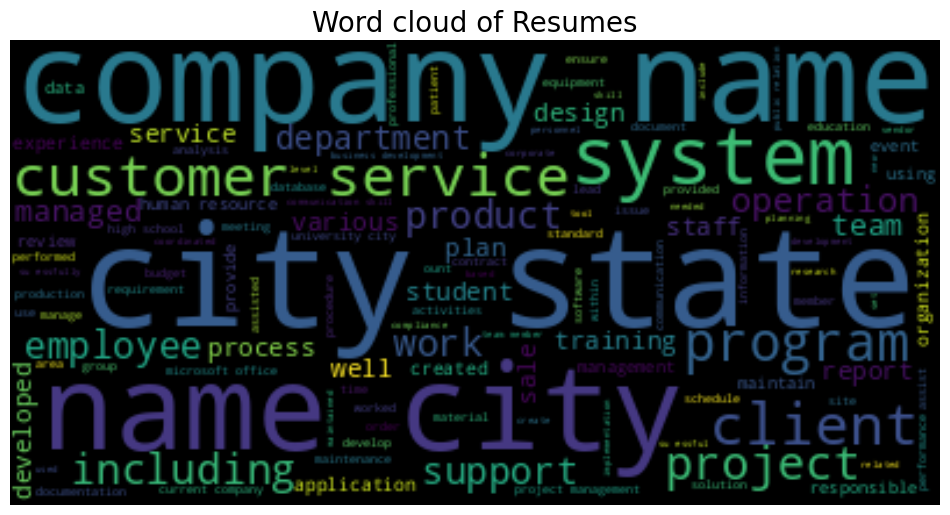

In [ ]:
# plotting wordcloud to illustrate the most appeared words
from wordcloud import WordCloud

wc = WordCloud().generate(clean_sentences)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud of Resumes", fontsize=20)
plt.show()

In [ ]:
# creating subsets of resume data that contains information about resume text (corpus) and category

categories = np.sort(resume_csv_data['Category'].unique())

# creating a list that  wil contain all categoris as an element, where every element (or category) with have their resumes
resume_categories = [resume_csv_data[resume_csv_data['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]

In [ ]:
type(resume_categories)

list

In [ ]:
resume_categories

[                                                 Resume    Category
 1808  ountant professional summary current ountant c...  ACCOUNTANT
 1809  ountant summary innovative energetic ountant p...  ACCOUNTANT
 1810  ountant highlights microsoft office intermedia...  ACCOUNTANT
 1811  ountant professional summary inpatient outpati...  ACCOUNTANT
 1812  ountant summary pursue excellence dynamic busi...  ACCOUNTANT
 ...                                                 ...         ...
 1921  general ountant professional summary around ye...  ACCOUNTANT
 1922  staff ountant professional summary currently g...  ACCOUNTANT
 1923  general ountant summary years experienced prof...  ACCOUNTANT
 1924  project ountant career focus dedicated focused...  ACCOUNTANT
 1925  senior ountant summary highly competent motiva...  ACCOUNTANT
 
 [118 rows x 2 columns],
                                                 Resume  Category
 439  advocate professional summary conscientious at...  ADVOCATE
 440  advocat

In [ ]:
print(f"Total elements in result category list: {len(resume_categories)}")

Total elements in result category list: 24


In [ ]:
# function to create a word cloud

def make_wordcloud(data):
    txt = ' '.join(txt for txt in data['Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap="magma"
    ).generate(txt)

    return wordcloud

**plotting word cloud and bar char chart for each category**

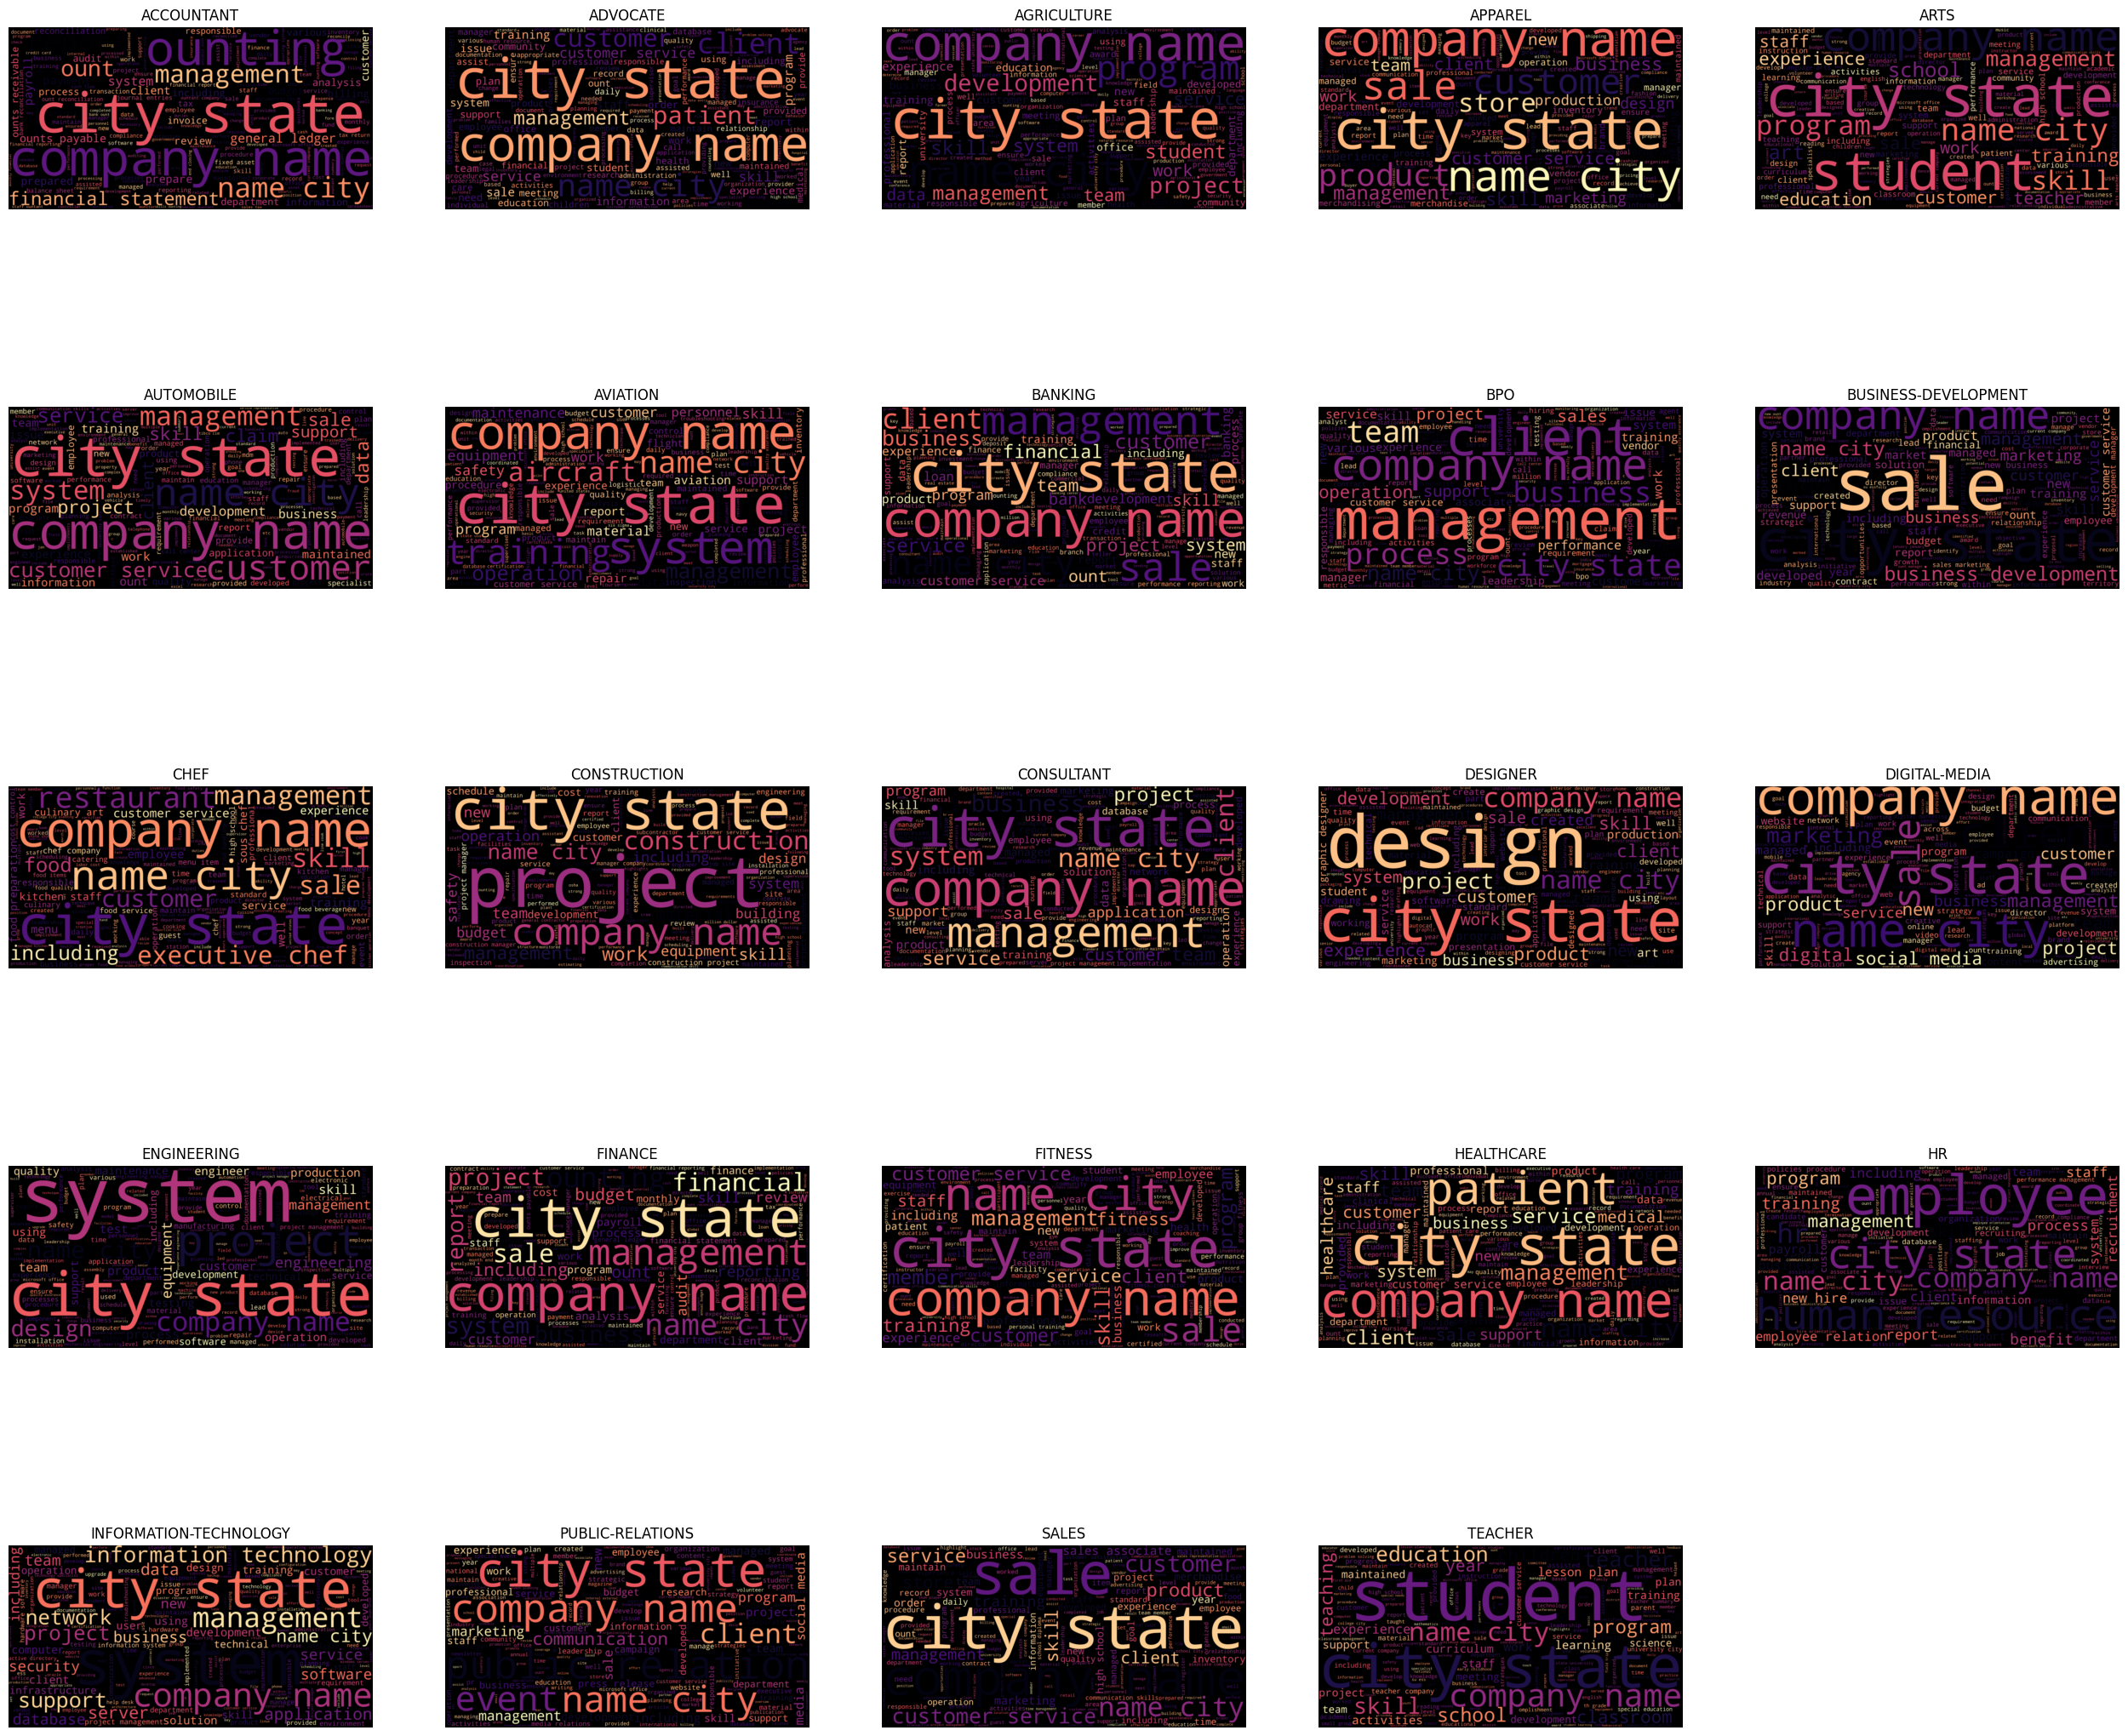

In [ ]:
# plotting wordcloud for each category

plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = make_wordcloud(resume_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [ ]:
# function to get word frequencies

def get_wordfreq(data):
    count = data['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

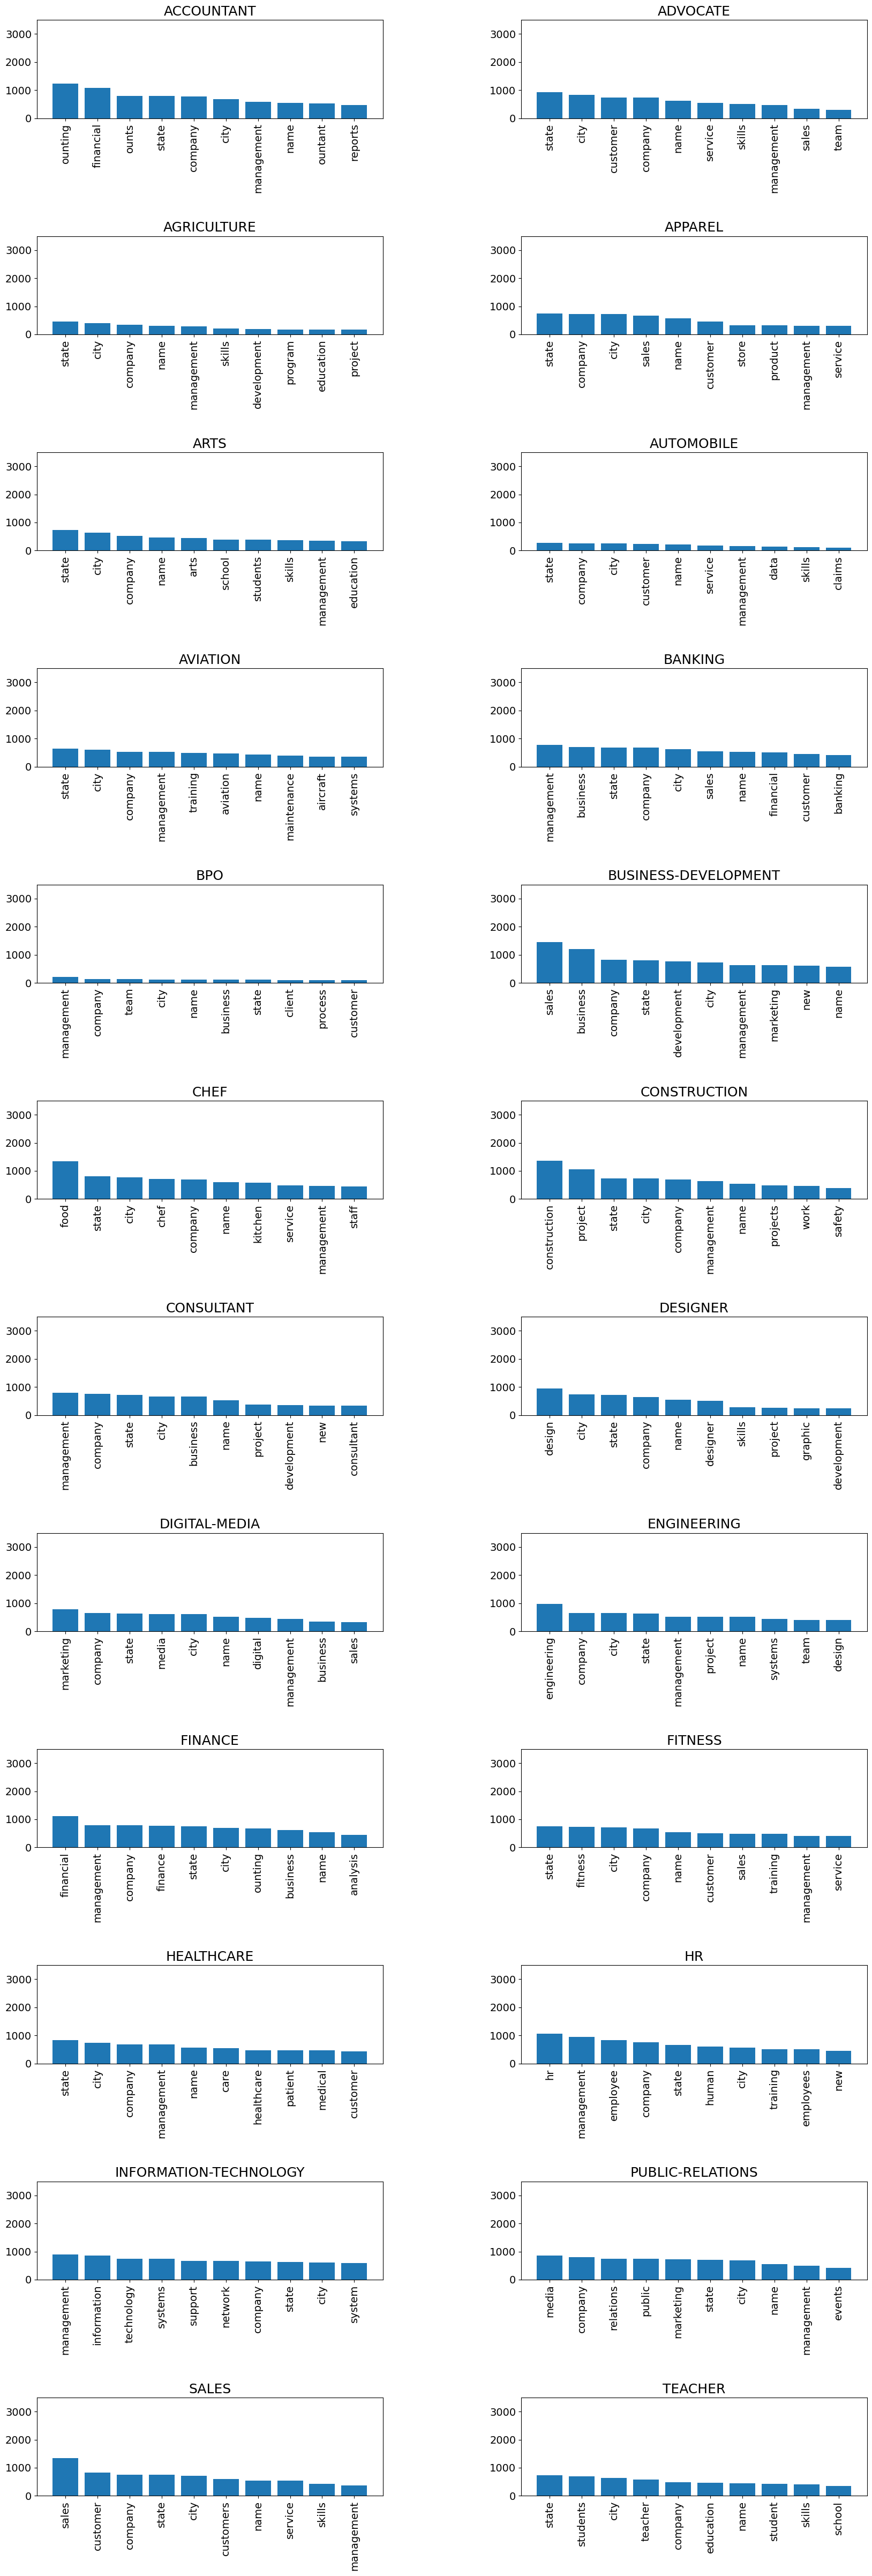

In [ ]:
# plotting fequency distribution to get more insight into the words

fig = plt.figure(figsize=(20, 60))

for i, category in enumerate(categories):
    wf = get_wordfreq(resume_categories[i])

    fig.add_subplot(12, 2, i + 1).set_title(category, fontsize=18)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)

plt.subplots_adjust(hspace=1.2, wspace=0.4)
plt.show()
plt.close()

These plots give us the insight insight of evry resume category. we can see that, state, city and are common in all categories (as it should be). If we look at the sales category, we found that sales word appeard most in this category. For finance, finance has the most appearance. These plots are providing class specific information, which is crucial to take a decision.

### Extracting data from PDF Resumes

In [ ]:
import PyPDF2
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag

In [ ]:
# taking a demo pdf file
demo_resume = "/content/drive/MyDrive/IC_Evaluation/archive/data/data/ENGINEERING/10030015.pdf"

In [ ]:
# function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

In [ ]:
demo_text = extract_text_from_pdf(demo_resume)

In [ ]:
demo_text

'ENGINEERING LAB TECHNICIAN\nCareer Focus\nMy main objective in seeking employment with Triumph Actuation Systems Inc. is to work in a professional atmosphere where I can utilize my\nskills and continue to gain experience in the aerospace industry to advance in my career.\nProfessional Experience\nEngineering Lab Technician\n \nOct 2016\n \nto \nCurrent\n \nCompany Name\n \nï¼\u200b \nCity\n \n, \nState\nResponsible for testing various seat structures to meet specific certification requirements. Â \nMaintain and calibrate test instruments to ensure testing capabilities are maintained.\nEnsure data is captured and recorded correctly for certification test reports.\nDuties also dynamic test set-up and static suite testing. \nEngineering Lab Technician, Sr. Specialist\n \nApr 2012\n \nto \nOct 2016\n \nCompany Name\n \nï¼\u200b \nCity\n \n, \nState\nUtilized skills learned from LabView Course 1 training to construct and maintain LabView VI programs.\nResponsible for fabricating and mainta

In [ ]:
converted_text = preprocess_text(demo_text)
converted_text

'engineering lab technician career focus main objective seeking employment triumph actuation systems inc work professional atmosphere utilize skills continue gain experience aerospace industry advance career professional experience engineering lab technician oct current company name city state responsible testing various seat structures meet specific certification requirements maintain calibrate test instruments ensure testing capabilities maintained ensure data captured recorded correctly certification test reports duties also dynamic test set static suite testing engineering lab technician sr specialist apr oct company name city state utilized skills learned labview course training construct maintain labview vi programs responsible fabricating maintaining hydraulic electrical test equipment complete development qualification programs apply engineering principles operate electrical mechanical hydraulic systems test pumps motors actuators aircraft work closely design engineers lab mana

In [ ]:
# getting the most frequent words in the demo resume
d_freq = nltk.FreqDist(converted_text)
d_common = d_freq.most_common(20)
d_common

[(' ', 273),
 ('e', 250),
 ('i', 194),
 ('n', 170),
 ('t', 164),
 ('a', 158),
 ('s', 156),
 ('r', 134),
 ('c', 121),
 ('o', 105),
 ('l', 88),
 ('m', 78),
 ('p', 59),
 ('g', 53),
 ('u', 53),
 ('d', 43),
 ('y', 41),
 ('b', 27),
 ('h', 22),
 ('f', 21)]

### Training with Machine Learning model

In [ ]:
# funtion to get label mapping
def get_integer_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

In [ ]:
resume_csv_data.head(5)

ID                                        Resume_html Category  \
0  16852973  <div class="fontsize fontface vmargins hmargin...       HR   
1  22323967  <div class="fontsize fontface vmargins hmargin...       HR   
2  33176873  <div class="fontsize fontface vmargins hmargin...       HR   
3  27018550  <div class="fontsize fontface vmargins hmargin...       HR   
4  17812897  <div class="fontsize fontface vmargins hmargin...       HR   

                                              Resume  
0  hr administrator marketing associate hr admini...  
1  hr specialist us hr operations summary versati...  
2  hr director summary years experience recruitin...  
3  hr specialist summary dedicated driven dynamic...  
4  hr manager skill highlights hr skills hr depar...

**label encoding**

In [ ]:
# converting text label into numerical values
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume_csv_data[i] = le.fit_transform(resume_csv_data[i])

integer_mapping = get_integer_mapping(le)

In [ ]:
integer_mapping

{'ACCOUNTANT': 0,
 'ADVOCATE': 1,
 'AGRICULTURE': 2,
 'APPAREL': 3,
 'ARTS': 4,
 'AUTOMOBILE': 5,
 'AVIATION': 6,
 'BANKING': 7,
 'BPO': 8,
 'BUSINESS-DEVELOPMENT': 9,
 'CHEF': 10,
 'CONSTRUCTION': 11,
 'CONSULTANT': 12,
 'DESIGNER': 13,
 'DIGITAL-MEDIA': 14,
 'ENGINEERING': 15,
 'FINANCE': 16,
 'FITNESS': 17,
 'HEALTHCARE': 18,
 'HR': 19,
 'INFORMATION-TECHNOLOGY': 20,
 'PUBLIC-RELATIONS': 21,
 'SALES': 22,
 'TEACHER': 23}

In [ ]:
resume_csv_data.head(5)

ID                                        Resume_html  Category  \
0  16852973  <div class="fontsize fontface vmargins hmargin...        19   
1  22323967  <div class="fontsize fontface vmargins hmargin...        19   
2  33176873  <div class="fontsize fontface vmargins hmargin...        19   
3  27018550  <div class="fontsize fontface vmargins hmargin...        19   
4  17812897  <div class="fontsize fontface vmargins hmargin...        19   

                                              Resume  
0  hr administrator marketing associate hr admini...  
1  hr specialist us hr operations summary versati...  
2  hr director summary years experience recruitin...  
3  hr specialist summary dedicated driven dynamic...  
4  hr manager skill highlights hr skills hr depar...

In [ ]:
resume_csv_data.Category.unique()

array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

**feature extraction**

In [ ]:
# extracting features and splitting into train and test data
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

resume_text = resume_csv_data['Resume'].values
resume_label = resume_csv_data['Category'].values

# vectorizing resume texts
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')

word_vectorizer.fit(resume_text)
resume_features = word_vectorizer.transform(resume_text)

# saving the feature extractor for further usage
pickle_out_word_vectorizer = open("/content/drive/MyDrive/IC_Evaluation/tidf_xgb_tfid", "wb")
pickle.dump(word_vectorizer, pickle_out_word_vectorizer)
pickle_out_word_vectorizer.close()

print ("Feature extraction completed.....!")

Feature extraction completed.....!


In [ ]:
type(resume_features)

scipy.sparse._csr.csr_matrix

In [ ]:
print(resume_features[0].shape)

(1, 37242)


In [ ]:
# https://www.kaggle.com/code/hendlabib12/resume-extraction#Resume-Parsing
# https://www.kaggle.com/code/sanchukanirupama/rf-based-multiclass-resume-classifier
# https://www.kaggle.com/code/egenego/resume-dataset-training-classification-analysis

In [ ]:
# splitting into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(resume_features,resume_label,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=resume_label)
print(X_train.shape)
print(X_test.shape)

(1987, 37242)
(497, 37242)


**applying k-nearest neighbors**

In [ ]:
# classification using k-nearest neighbors

from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.65
Accuracy of KNeighbors Classifier on test set:     0.51


In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        24
           1       0.38      0.25      0.30        24
           2       1.00      0.23      0.38        13
           3       0.38      0.16      0.22        19
           4       0.58      0.33      0.42        21
           5       0.33      0.14      0.20         7
           6       1.00      0.38      0.55        24
           7       0.85      0.48      0.61        23
           8       0.00      0.00      0.00         4
           9       0.30      0.62      0.41        24
          10       0.88      0.62      0.73        24
          11       0.71      0.68      0.70        22
          12       0.17      0.04      0.07        23
          13       0.72      0.62      0.67        21
          14       0.62      0.42      0.50        19
          15       0.65      0.54      0.

In [ ]:
# save the classifier as pickle
import pickle
pickle_out = open("/content/drive/MyDrive/IC_Evaluation/knn_on_resume_csv", "wb")
pickle.dump(clf, pickle_out)
pickle_out.close()

**applying Random Forest**

In [ ]:
## Random Forest
# using grid search for find optimal parameter values for RF classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 700, 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,11],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 900}


In [ ]:
# defining a params_list dictionary to store best parametes after fine-tuning
params_list = grid_search.best_params_

# getting the best validation score
print(f"Highest accuracy obtained during grid search cross-validation: {100*(grid_search.best_score_):.4f}%")

Highest accuracy obtained during grid search cross-validation: 61.0973%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state=42, max_features= params_list.get('max_features'),
                                  n_estimators= params_list.get('n_estimators'),
                                  max_depth= params_list.get('max_depth'),
                                  criterion= params_list.get('criterion'))
RF_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=11, max_features='auto', n_estimators=900,
                       random_state=42)

In [ ]:
# training accuracy of Random forest
rf_train_acc = RF_model.score(X_train, y_train)
print(f"Train accuracy of Random Forest: {100*(rf_train_acc):.4f}%")

Train accuracy of Random Forest: 96.2255%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state=42, max_features= 'auto',
                                  n_estimators= 900,
                                  max_depth= 11,
                                  criterion= 'gini')
RF_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=11, max_features='auto', n_estimators=900,
                       random_state=42)

In [ ]:
# training accuracy of Random forest
rf_train_acc = RF_model.score(X_train, y_train)
print(f"Train accuracy of Random Forest: {100*(rf_train_acc):.4f}%")

Train accuracy of Random Forest: 96.2255%


In [ ]:
prediction=RF_model.predict(X_test)
# prediction

In [ ]:
from sklearn.metrics import accuracy_score
rf_test_acc = accuracy_score(y_test, prediction)
print(f"Test accuracy of Random Forest: {100*(rf_test_acc):.2f}%")

Test accuracy of Random Forest: 61.37%


In [ ]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (RF_model, metrics.classification_report(y_test, prediction)))

model report: RandomForestClassifier(max_depth=11, max_features='auto', n_estimators=900,
                       random_state=42): 
               precision    recall  f1-score   support

           0       0.48      0.96      0.64        24
           1       0.74      0.58      0.65        24
           2       1.00      0.23      0.38        13
           3       1.00      0.32      0.48        19
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         7
           6       0.76      0.79      0.78        24
           7       0.76      0.57      0.65        23
           8       0.00      0.00      0.00         4
           9       0.45      0.58      0.51        24
          10       0.70      0.88      0.78        24
          11       0.75      0.82      0.78        22
          12       0.62      0.22      0.32        23
          13       0.80      0.76      0.78        21
          14       0.73      0.42      0.53        19
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# installing package to get specificity
!pip install imblearn

In [ ]:
# specificity
from imblearn.metrics import specificity_score
sp = specificity_score(y_test, prediction, average='weighted')
sp_1 = specificity_score(y_test, prediction, average='micro')
sp_2 = specificity_score(y_test, prediction, average='macro')

print(f"Macro specificity: {100*sp_2:.2f}")
print(f"Micro specificity: {100*sp_1:.2f}")
print(f"Weighted specificity: {100*sp:.2f}")

Macro specificity: 98.31
Micro specificity: 98.32
Weighted specificity: 98.14


In [ ]:
# save the classifier as pickle
import pickle
pickle_out = open("/content/drive/MyDrive/IC_Evaluation/RF_on_resume_csv", "wb")
pickle.dump(RF_model, pickle_out)
pickle_out.close()

**XGBoost**

In [ ]:
# XGBoost
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
import xgboost as xgb
# specificity
from imblearn.metrics import specificity_score

xgb_model = xgb.XGBClassifier()

# fit to the model
xgb_model.fit(X_train, y_train)

# train accuracy
tr_score = xgb_model.score(X_train, y_train)
print(f"Training score of XGBoost: {100*tr_score:.2f}%")

# prediction for test data
prediction = xgb_model.predict(X_test)

# accuracy
acc = metrics.accuracy_score(y_test, prediction)
print(f"Accuracy: {100*acc:.2f}%")
# ROC-AUC
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test),  multi_class="ovr")
print("ROC-AUC score is: ", round(100*roc_auc, 2), "%")

# Matthew's coefficent
mcc = matthews_corrcoef(y_test, prediction)
print("The Matthews correlation coefficinet (MCC) is: ", round(100*mcc, 2), "%")

# specificity
sp = specificity_score(y_test, prediction, average='weighted')
print(f"Weighted specificity: {100*sp:.2f}%")

# classification reports
print(classification_report(y_test, prediction))

Training score of XGBoost: 100.00%
Accuracy: 74.85%
ROC-AUC score is:  97.09 %
The Matthews correlation coefficinet (MCC) is:  73.71 %
Weighted specificity: 98.83%
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.80      0.83      0.82        24
           2       0.80      0.62      0.70        13
           3       0.58      0.37      0.45        19
           4       0.52      0.52      0.52        21
           5       0.67      0.29      0.40         7
           6       0.95      0.79      0.86        24
           7       0.82      0.61      0.70        23
           8       1.00      1.00      1.00         4
           9       0.73      0.67      0.70        24
          10       0.90      0.79      0.84        24
          11       0.87      0.91      0.89        22
          12       0.58      0.61      0.60        23
          13       0.80      0.95      0.87        21
          14       0.61  

**Fine-tuning XGBoost**

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(
    learning_rate=0.1,
    colsample_bytree=0.4,
    subsample=0.8,
    objective='multi:softmax',
    n_estimators=100,
    reg_alpha=0.3,
    max_depth=4,
    gamma=7
)

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror", "mlogloss"]  # Multi-class evaluation metrics

%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.39004	validation_0-mlogloss:2.80468	validation_1-merror:0.51911	validation_1-mlogloss:2.88496
[1]	validation_0-merror:0.30196	validation_0-mlogloss:2.53564	validation_1-merror:0.44266	validation_1-mlogloss:2.65968
[2]	validation_0-merror:0.22899	validation_0-mlogloss:2.29990	validation_1-merror:0.38833	validation_1-mlogloss:2.46671
[3]	validation_0-merror:0.21389	validation_0-mlogloss:2.12249	validation_1-merror:0.35010	validation_1-mlogloss:2.32050
[4]	validation_0-merror:0.19326	validation_0-mlogloss:1.97750	validation_1-merror:0.33199	validation_1-mlogloss:2.18564
[5]	validation_0-merror:0.18218	validation_0-mlogloss:1.86815	validation_1-merror:0.32596	validation_1-mlogloss:2.08971
[6]	validation_0-merror:0.18118	validation_0-mlogloss:1.76795	validation_1-merror:0.31791	validation_1-mlogloss:1.99894
[7]	validation_0-merror:0.18168	validation_0-mlogloss:1.68968	validation_1-merror:0.32193	validation_1-mlogloss:1.92823
[8]	validation_0-merror:0.17967	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [ ]:
# train accuracy
tr_score = model.score(X_train, y_train)
print(f"Training score of XGBoost: {100*tr_score:.2f}%")

# prediction for test data
prediction = model.predict(X_test)

# accuracy
acc = metrics.accuracy_score(y_test, prediction)
print(f"Accuracy: {100*acc:.2f}%")
# ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test),  multi_class="ovr")
print("ROC-AUC score is: ", round(100*roc_auc, 2), "%")

# Matthew's coefficent
mcc = matthews_corrcoef(y_test, prediction)
print("The Matthews correlation coefficinet (MCC) is: ", round(100*mcc, 2), "%")

# specificity
sp = specificity_score(y_test, prediction, average='weighted')
print(f"Weighted specificity: {100*sp:.2f}%")

# classification reports
print(classification_report(y_test, prediction))

Training score of XGBoost: 84.35%
Accuracy: 75.05%
ROC-AUC score is:  97.72 %
The Matthews correlation coefficinet (MCC) is:  73.93 %
Weighted specificity: 98.83%
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        24
           1       0.79      0.79      0.79        24
           2       0.78      0.54      0.64        13
           3       0.58      0.37      0.45        19
           4       0.53      0.48      0.50        21
           5       1.00      0.29      0.44         7
           6       0.90      0.79      0.84        24
           7       0.88      0.65      0.75        23
           8       1.00      0.50      0.67         4
           9       0.68      0.71      0.69        24
          10       1.00      0.79      0.88        24
          11       0.84      0.95      0.89        22
          12       0.61      0.61      0.61        23
          13       0.83      0.95      0.89        21
          14       0.71   

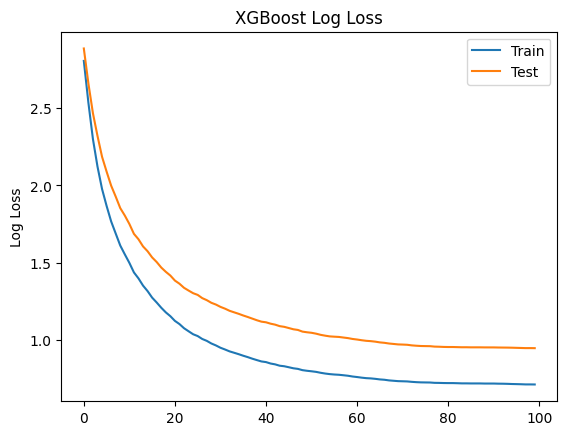

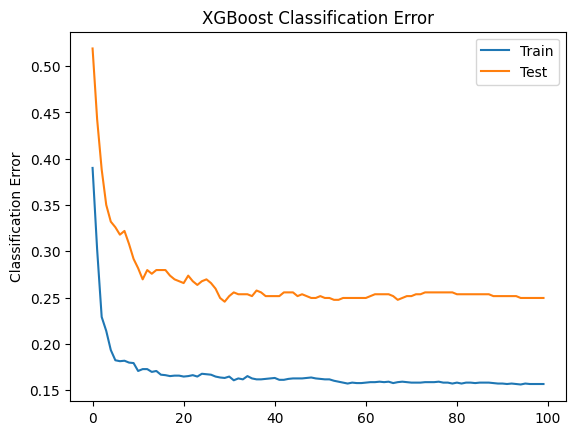

In [ ]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [ ]:
# https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
# https://towardsdatascience.com/selecting-optimal-parameters-for-xgboost-model-training-c7cd9ed5e45e

In [ ]:
model = xgb.XGBClassifier(
    learning_rate=0.01,
    colsample_bytree=0.4,
    subsample=0.7,
    objective='multi:softmax',
    n_estimators=500,
    reg_alpha=0.9,
    max_depth=11,
    gamma=9
)

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror", "mlogloss"]  # Multi-class evaluation metrics

%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.41218	validation_0-mlogloss:3.14316	validation_1-merror:0.53924	validation_1-mlogloss:3.14974
[1]	validation_0-merror:0.32562	validation_0-mlogloss:3.10915	validation_1-merror:0.45272	validation_1-mlogloss:3.11971
[2]	validation_0-merror:0.26623	validation_0-mlogloss:3.07114	validation_1-merror:0.41046	validation_1-mlogloss:3.08806
[3]	validation_0-merror:0.24711	validation_0-mlogloss:3.03637	validation_1-merror:0.38028	validation_1-mlogloss:3.05642
[4]	validation_0-merror:0.22798	validation_0-mlogloss:3.00227	validation_1-merror:0.33400	validation_1-mlogloss:3.02668
[5]	validation_0-merror:0.22194	validation_0-mlogloss:2.97190	validation_1-merror:0.31388	validation_1-mlogloss:2.99954
[6]	validation_0-merror:0.21490	validation_0-mlogloss:2.93923	validation_1-merror:0.31992	validation_1-mlogloss:2.97153
[7]	validation_0-merror:0.21137	validation_0-mlogloss:2.91020	validation_1-merror:0.31791	validation_1-mlogloss:2.94668
[8]	validation_0-merror:0.20634	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=9, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

Training score of XGBoost: 80.72%
Accuracy: 76.66%
ROC-AUC score is:  97.34 %
The Matthews correlation coefficinet (MCC) is:  75.65 %
Weighted specificity: 98.88%
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.80      0.83      0.82        24
           2       1.00      0.54      0.70        13
           3       1.00      0.37      0.54        19
           4       0.61      0.52      0.56        21
           5       1.00      0.29      0.44         7
           6       0.91      0.83      0.87        24
           7       0.89      0.70      0.78        23
           8       0.00      0.00      0.00         4
           9       0.65      0.83      0.73        24
          10       0.90      0.79      0.84        24
          11       0.91      0.95      0.93        22
          12       0.70      0.61      0.65        23
          13       0.84      1.00      0.91        21
          14       0.77   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


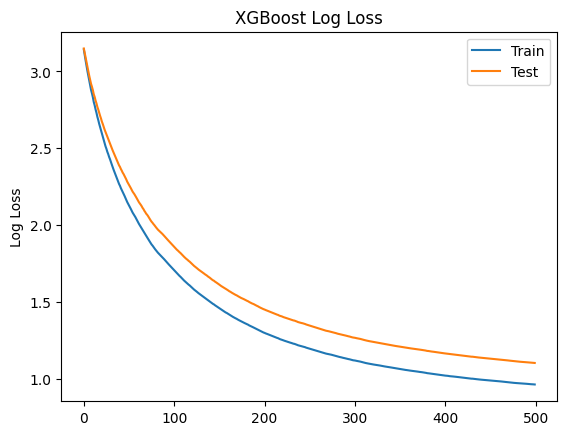

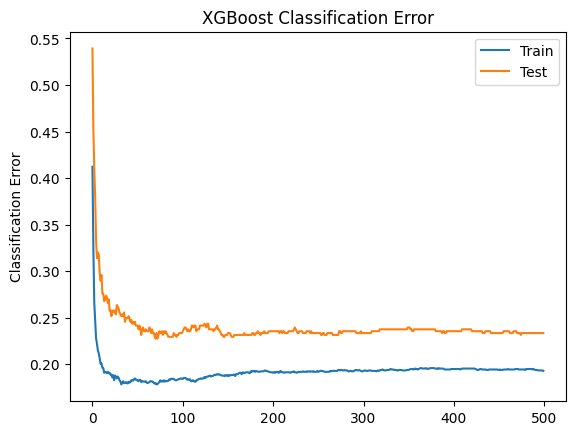

In [ ]:
# train accuracy
tr_score = model.score(X_train, y_train)
print(f"Training score of XGBoost: {100*tr_score:.2f}%")

# prediction for test data
prediction = model.predict(X_test)

# accuracy
acc = metrics.accuracy_score(y_test, prediction)
print(f"Accuracy: {100*acc:.2f}%")
# ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test),  multi_class="ovr")
print("ROC-AUC score is: ", round(100*roc_auc, 2), "%")

# Matthew's coefficent
mcc = matthews_corrcoef(y_test, prediction)
print("The Matthews correlation coefficinet (MCC) is: ", round(100*mcc, 2), "%")

# specificity
sp = specificity_score(y_test, prediction, average='weighted')
print(f"Weighted specificity: {100*sp:.2f}%")

# classification reports
print(classification_report(y_test, prediction))


# plotting training and validation loss and error
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [ ]:
# save the classifier as pickle
import pickle
pickle_out = open("/content/drive/MyDrive/IC_Evaluation/XGB_on_resume_csv", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()